Epoch 1/5
938/938 [==============================] - 37s 38ms/step - loss: 0.1797 - accuracy: 0.9468
Epoch 2/5
938/938 [==============================] - 35s 37ms/step - loss: 0.0611 - accuracy: 0.9815
Epoch 3/5
938/938 [==============================] - 35s 38ms/step - loss: 0.0404 - accuracy: 0.9877
Epoch 4/5
938/938 [==============================] - 35s 38ms/step - loss: 0.0289 - accuracy: 0.9908
Epoch 5/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0195 - accuracy: 0.9942
313/313 - 2s - loss: 0.0413 - accuracy: 0.9861 - 2s/epoch - 7ms/step
Test accuracy: 0.9861000180244446
313/313 [==============================] - 2s 7ms/step


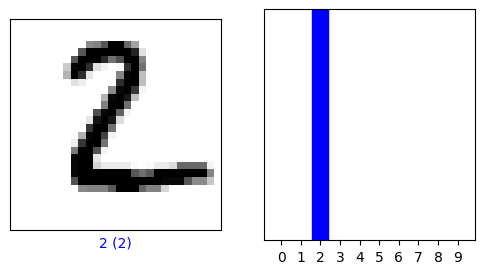

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images[..., np.newaxis], train_labels, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')
predictions = model.predict(test_images[..., np.newaxis])


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)


    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f'{predicted_label} ({true_label})', color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()